<a href="https://colab.research.google.com/github/mayuit/ML-Papers-of-the-Week/blob/main/Spotify_song_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Load the uploaded Spotify track dataset
# - Load the CSV file into a DataFrame
# Display the first few rows of the DataFrame
# Print the shape of the DataFrame
# Describe the 'popularity' column
import pandas as pd

file_path = '/content/Spotify.csv'
df_tracks = pd.read_csv(file_path)

print(df_tracks.head())
print(df_tracks.shape)
print(df_tracks['popularity'].describe())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [31]:
# Checking the data class
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101012 entries, 0 to 101011
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        101012 non-null  int64  
 1   track_id          101012 non-null  object 
 2   artists           101011 non-null  object 
 3   album_name        101011 non-null  object 
 4   track_name        101011 non-null  object 
 5   popularity        101012 non-null  int64  
 6   duration_ms       101012 non-null  int64  
 7   explicit          101012 non-null  bool   
 8   danceability      101012 non-null  float64
 9   energy            101012 non-null  float64
 10  key               101012 non-null  int64  
 11  loudness          101012 non-null  float64
 12  mode              101012 non-null  int64  
 13  speechiness       101012 non-null  float64
 14  acousticness      101011 non-null  float64
 15  instrumentalness  101011 non-null  float64
 16  liveness          10

In [32]:
df_tracks.dropna(subset=['artists', 'album_name', 'track_name'], inplace=True)
print("Rows with missing values in 'artists', 'album_name', or 'track_name' have been dropped.")
print(f"New shape of df_tracks: {df_tracks.shape}")

Rows with missing values in 'artists', 'album_name', or 'track_name' have been dropped.
New shape of df_tracks: (101011, 21)


In [33]:
print("Missing values after dropping rows:")
print(df_tracks[['artists', 'album_name', 'track_name']].isnull().sum())
print(f"Updated shape of df_tracks: {df_tracks.shape}")

Missing values after dropping rows:
artists       0
album_name    0
track_name    0
dtype: int64
Updated shape of df_tracks: (101011, 21)


In [34]:
# Checking for unique values to understand categorical data
summary = pd.DataFrame({
    'n_unique': df_tracks.nunique(),
    'dtype': df_tracks.dtypes,
    'nulls': df_tracks.isnull().sum(),
    'memory_mb': df_tracks.memory_usage(deep=True).sum() / 1024**2
})
print(summary.sort_values('n_unique', ascending=False))




                  n_unique    dtype  nulls  memory_mb
Unnamed: 0          101011    int64      0  45.630812
track_id             79947   object      0  45.630812
track_name           65710   object      0  45.630812
duration_ms          46441    int64      0  45.630812
tempo                42309  float64      1  45.630812
album_name           41281   object      0  45.630812
artists              27880   object      0  45.630812
loudness             18516  float64      0  45.630812
instrumentalness      5319  float64      1  45.630812
acousticness          5043  float64      1  45.630812
energy                1923  float64      0  45.630812
liveness              1717  float64      1  45.630812
valence               1655  float64      1  45.630812
speechiness           1487  float64      0  45.630812
danceability          1108  float64      0  45.630812
track_genre            102   object      1  45.630812
popularity             101    int64      0  45.630812
key                     12  

In [35]:
df_tracks.drop_duplicates(subset='track_id', inplace=True)
print(f"Number of rows in df_tracks after dropping duplicates: {df_tracks.shape[0]}")

Number of rows in df_tracks after dropping duplicates: 79947


In [36]:
# Checking the data class
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79947 entries, 0 to 101011
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79947 non-null  int64  
 1   track_id          79947 non-null  object 
 2   artists           79947 non-null  object 
 3   album_name        79947 non-null  object 
 4   track_name        79947 non-null  object 
 5   popularity        79947 non-null  int64  
 6   duration_ms       79947 non-null  int64  
 7   explicit          79947 non-null  bool   
 8   danceability      79947 non-null  float64
 9   energy            79947 non-null  float64
 10  key               79947 non-null  int64  
 11  loudness          79947 non-null  float64
 12  mode              79947 non-null  int64  
 13  speechiness       79947 non-null  float64
 14  acousticness      79946 non-null  float64
 15  instrumentalness  79946 non-null  float64
 16  liveness          79946 non-null  float64
 1

In [37]:
print("Missing values in each column after cleansing and dropping duplicates:")
print(df_tracks.isnull().sum())

Missing values in each column after cleansing and dropping duplicates:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64


In [39]:
df_tracks.dropna(subset=['acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'], inplace=True)
print("Rows with missing values in 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', and 'track_genre' have been dropped.")
print(f"New shape of df_tracks: {df_tracks.shape}")

Rows with missing values in 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', and 'track_genre' have been dropped.
New shape of df_tracks: (79946, 21)


In [40]:
print("Missing values in each column after cleansing and dropping duplicates:")
print(df_tracks.isnull().sum())

Missing values in each column after cleansing and dropping duplicates:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


visualize the distributions of the specified numerical columns using box plots and histograms to identify potential outliers.



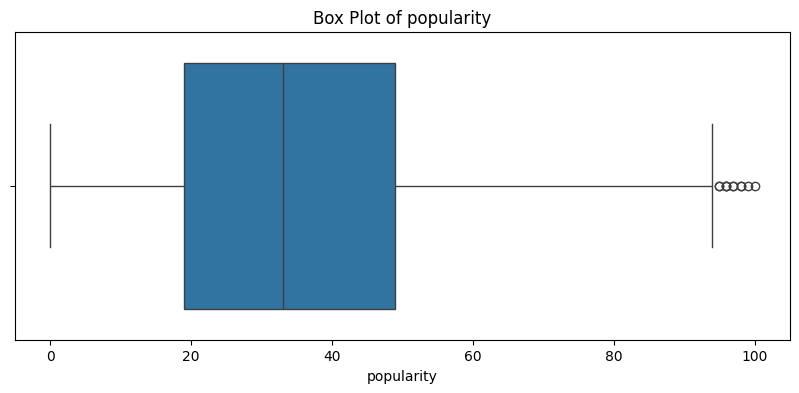

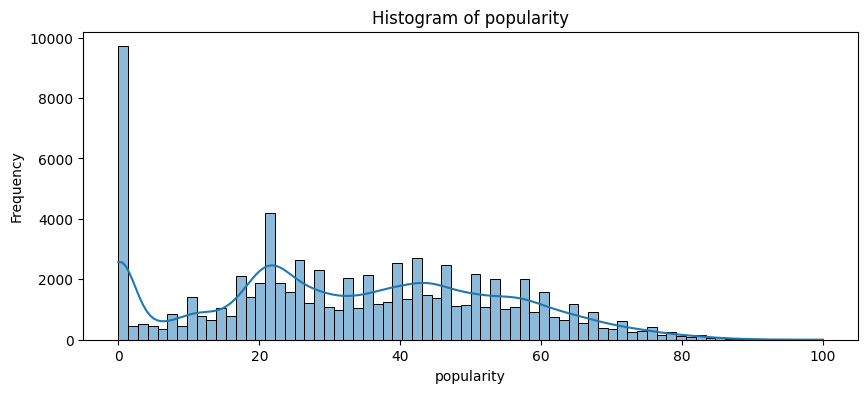

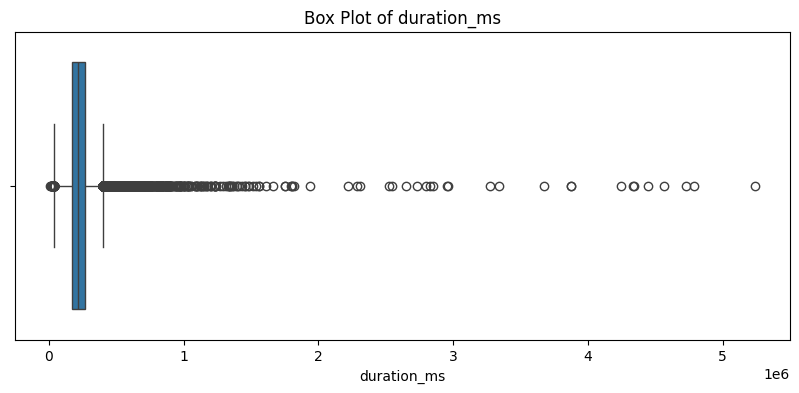

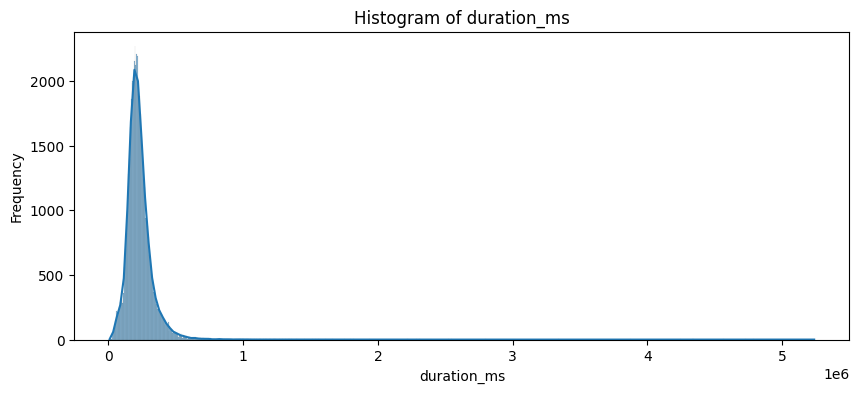

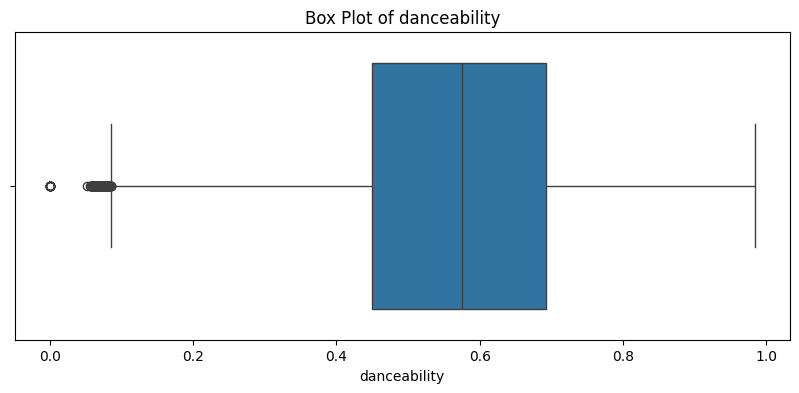

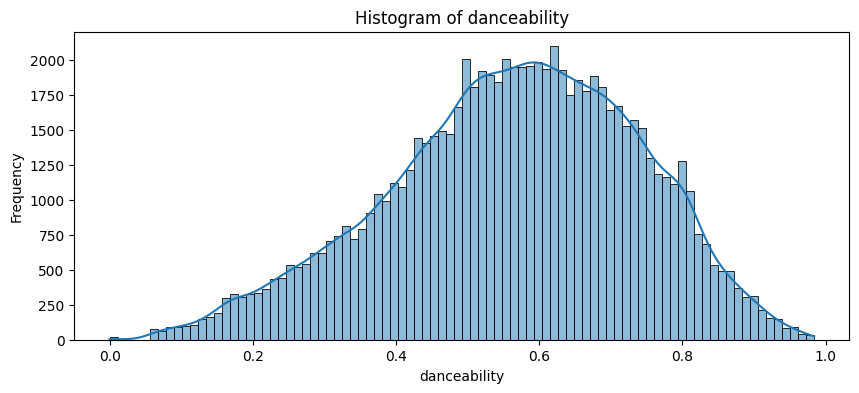

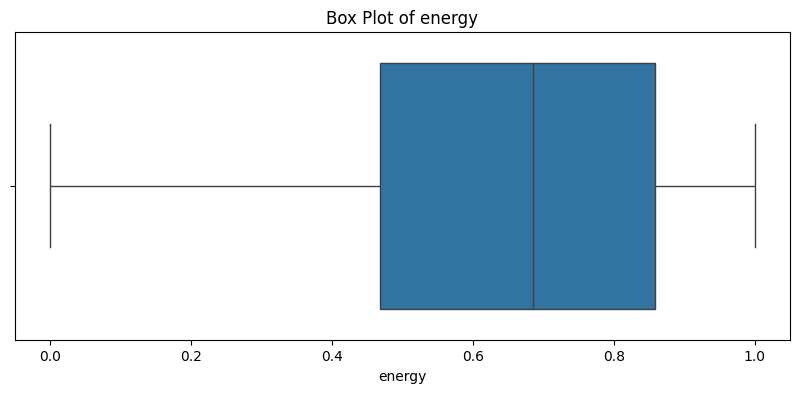

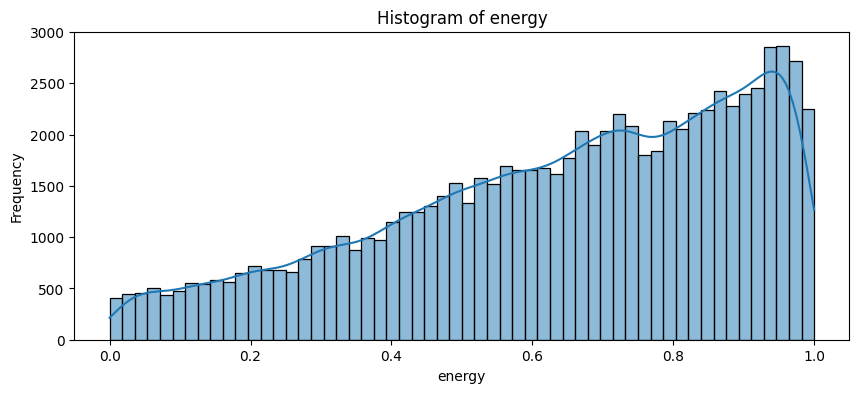

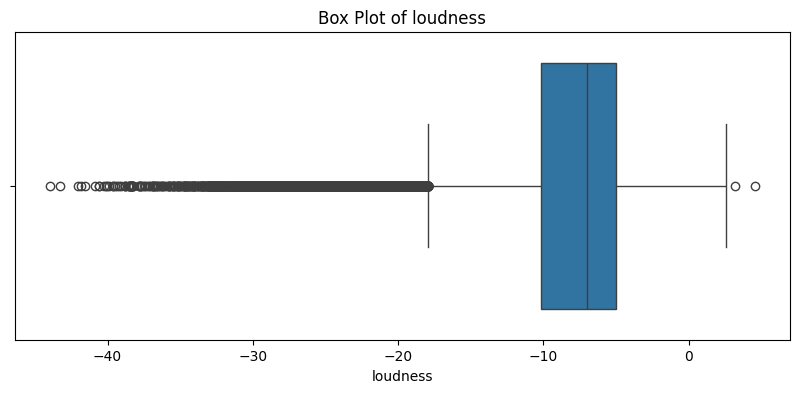

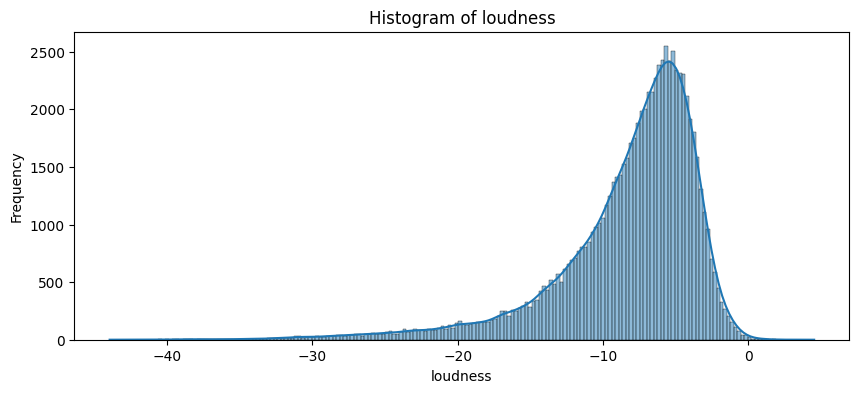

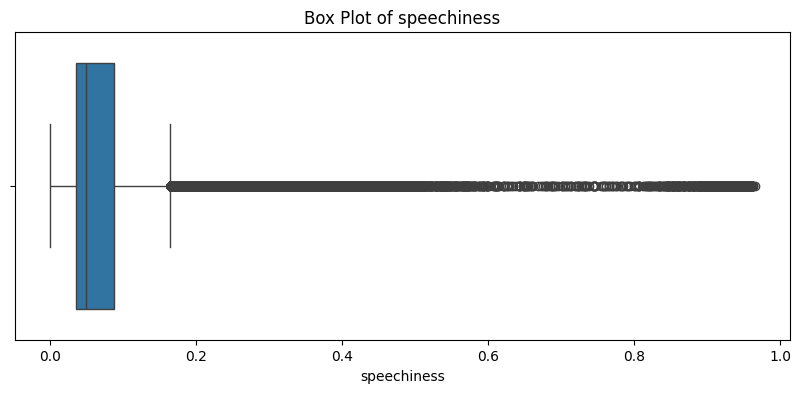

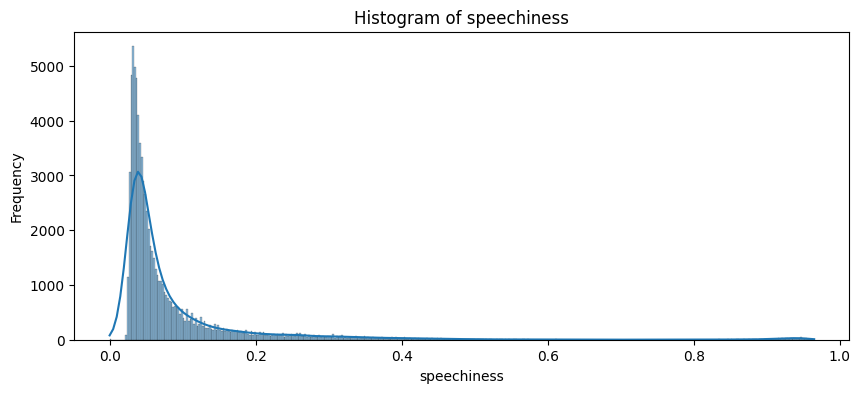

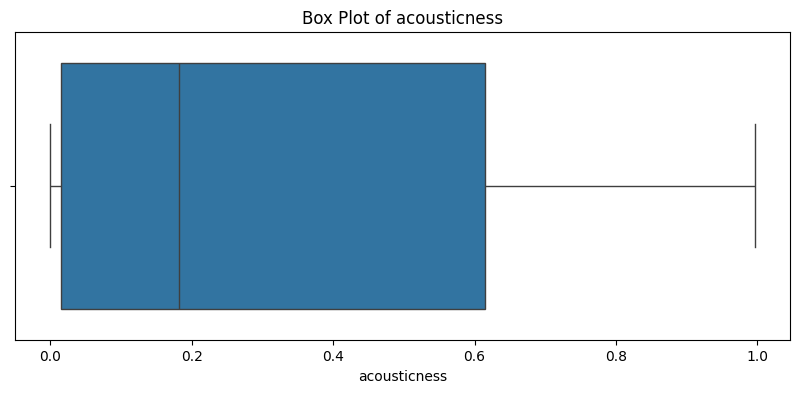

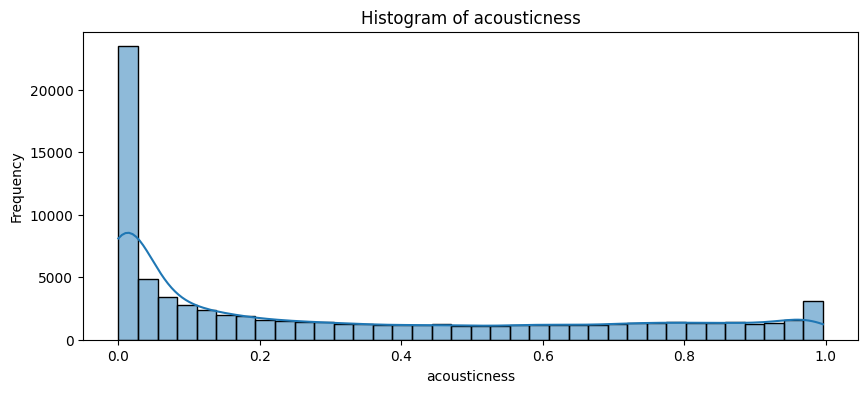

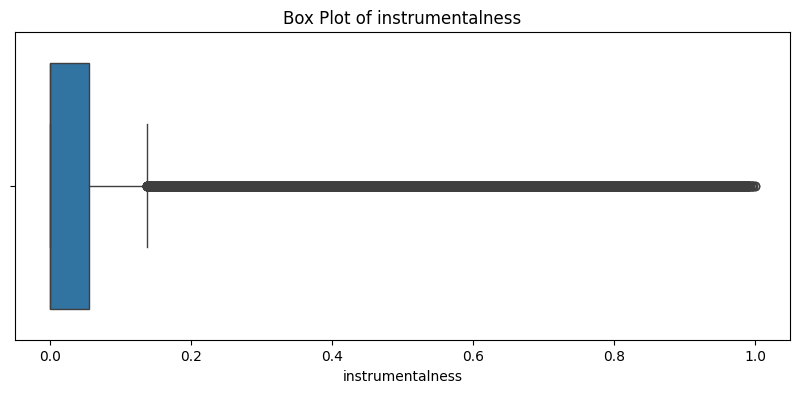

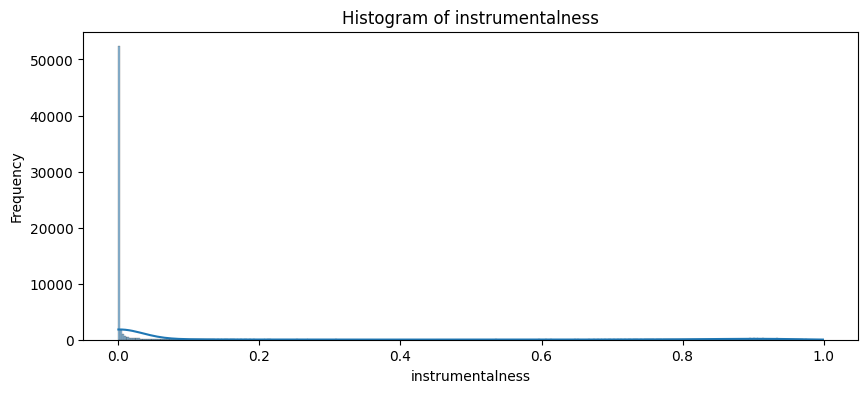

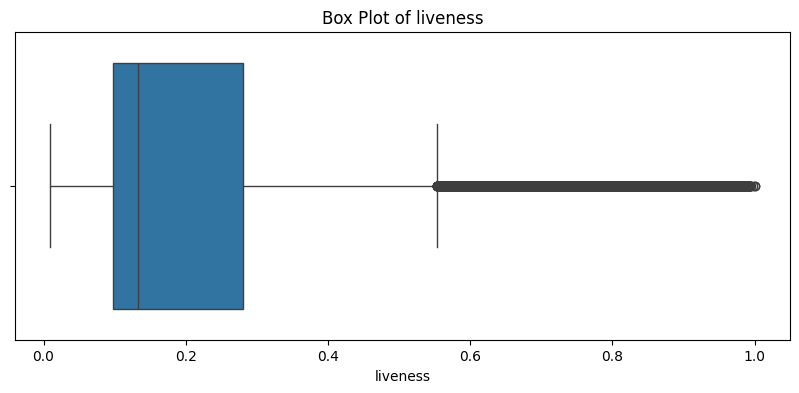

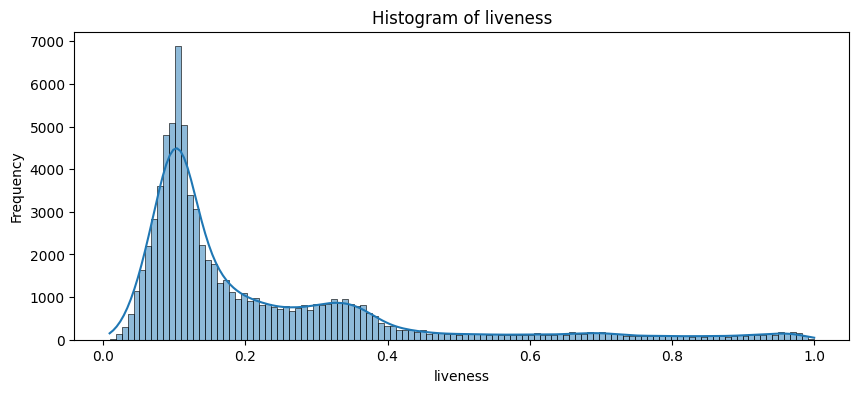

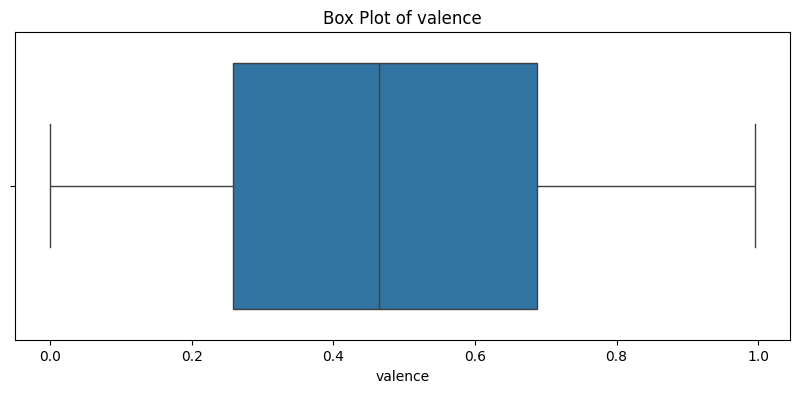

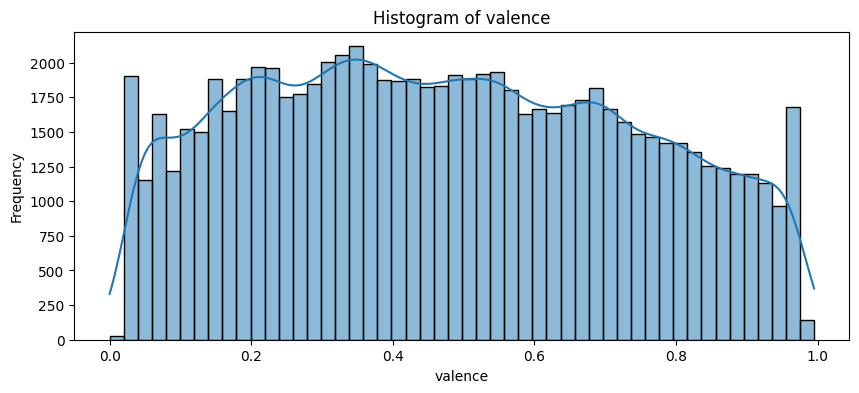

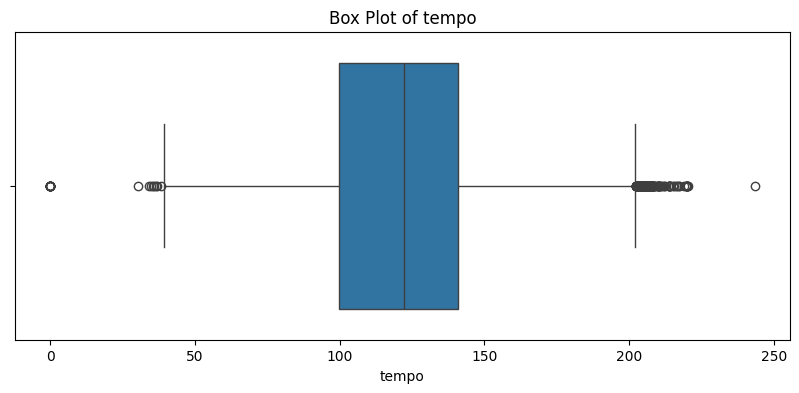

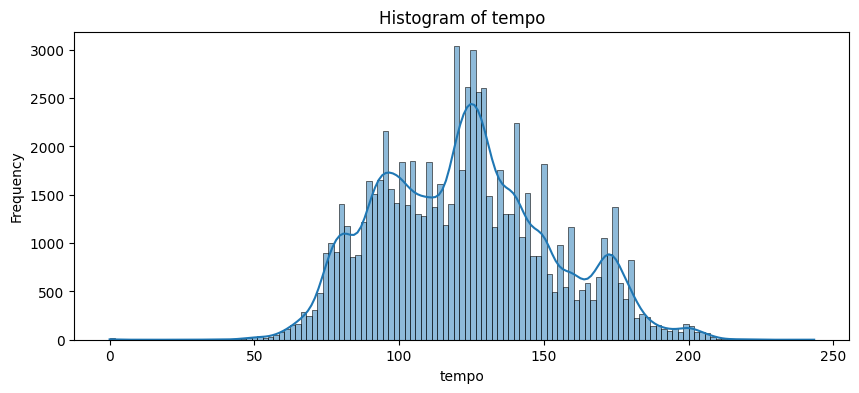

Generated box plots and histograms for all specified numerical columns.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo']

for col in numerical_cols:
    # Create a box plot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_tracks[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Create a histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df_tracks[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("Generated box plots and histograms for all specified numerical columns.")

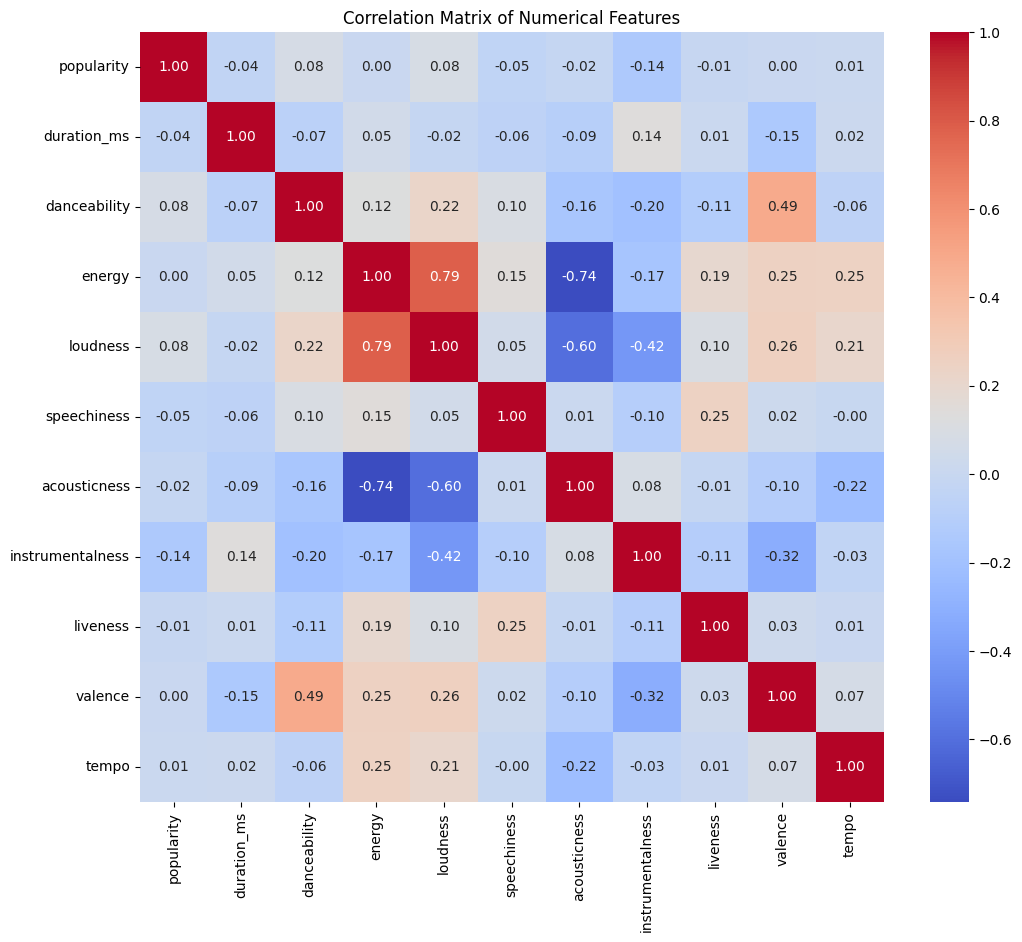

Generated correlation matrix for numerical features.


In [76]:
correlation_matrix = df_tracks[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Generated correlation matrix for numerical features.")


Inspecting the categorical columns,



In [44]:
categorical_cols = ['artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'track_genre','time_signature']
print("Defined the list of categorical columns for inspection.")

Defined the list of categorical columns for inspection.


In [45]:
for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
    print(f"Number of unique values: {df_tracks[col].nunique()}")
    print("Top 10 most frequent values:")
    print(df_tracks[col].value_counts().head(10))


--- Column: artists ---
Number of unique values: 27880
Top 10 most frequent values:
artists
George Jones         260
my little airport    171
The Beatles          149
BTS                  143
Glee Cast            139
Håkan Hellström      139
Hank Williams        136
Linkin Park          133
Scooter              129
OneRepublic          124
Name: count, dtype: int64

--- Column: album_name ---
Number of unique values: 41281
Top 10 most frequent values:
album_name
The Complete Hank Williams     110
Mozart: A Night of Classics     75
Alternative Christmas 2022      72
Greatest Hits                   70
Mozart - All Day Classics       68
Hans Zimmer: Epic Scores        68
Best Of Karneval                58
Mozart - Inspiring Classics     58
Karneval 2022 100%              56
Mozart - A Classical Dawn       54
Name: count, dtype: int64

--- Column: track_name ---
Number of unique values: 65710
Top 10 most frequent values:
track_name
Rockin' Around The Christmas Tree         48
Little Saint

## Initial Feature Engineering Ideas



Create the 'num_artists' feature,  split the 'artists' column by the delimiter (semicolon) and count the number of resulting artists for each track. Store this count in the new 'num_artists' column.



In [46]:
df_tracks['num_artists'] = df_tracks['artists'].apply(lambda x: len(str(x).split(';')))
print("Created new feature 'num_artists' by counting artists per track.")
print(df_tracks[['artists', 'num_artists']].head())

Created new feature 'num_artists' by counting artists per track.
                  artists  num_artists
0             Gen Hoshino            1
1            Ben Woodward            1
2  Ingrid Michaelson;ZAYN            2
3            Kina Grannis            1
4        Chord Overstreet            1


 create new features representing the length of the 'album_name' and 'track_name' columns. This will convert high cardinality categorical features into potentially useful numerical features.



In [47]:
df_tracks['album_name_length'] = df_tracks['album_name'].apply(lambda x: len(str(x)))
df_tracks['track_name_length'] = df_tracks['track_name'].apply(lambda x: len(str(x)))

print("Created new features 'album_name_length' and 'track_name_length'.")
print(df_tracks[['album_name', 'album_name_length', 'track_name', 'track_name_length']].head())

Created new features 'album_name_length' and 'track_name_length'.
                                          album_name  album_name_length  \
0                                             Comedy                  6   
1                                   Ghost (Acoustic)                 16   
2                                     To Begin Again                 14   
3  Crazy Rich Asians (Original Motion Picture Sou...                 54   
4                                            Hold On                  7   

                   track_name  track_name_length  
0                      Comedy                  6  
1            Ghost - Acoustic                 16  
2              To Begin Again                 14  
3  Can't Help Falling In Love                 26  
4                     Hold On                  7  


## Prepare Data for Modeling



separate the target variable 'popularity' from the features. define 'y' as the 'popularity' column and 'X' as the remaining features after dropping the specified columns that are not suitable for direct model training.



In [48]:
y = df_tracks['popularity']
X = df_tracks.drop(columns=['popularity', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])

print("Target variable 'y' and feature matrix 'X' defined.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Target variable 'y' and feature matrix 'X' defined.
Shape of X: (79946, 18)
Shape of y: (79946,)


separate the columns in the feature matrix `X` into `numerical_features` and `categorical_features` lists- facilitate subsequent preprocessing steps like scaling and encoding.



In [50]:
numerical_features = [
    'duration_ms', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'num_artists', 'album_name_length', 'track_name_length'
]
categorical_features = [
    'explicit', 'key', 'mode', 'track_genre', 'time_signature'
]

print("Defined numerical and categorical feature lists.")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Defined numerical and categorical feature lists.
Numerical features: ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'num_artists', 'album_name_length', 'track_name_length']
Categorical features: ['explicit', 'key', 'mode', 'track_genre', 'time_signature']


split the feature matrix `X` and the target variable `y` into training and testing sets using `train_test_split`


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (63956, 18)
Shape of X_test: (15990, 18)
Shape of y_train: (63956,)
Shape of y_test: (15990,)


 initialize a `StandardScaler`, fit it to the numerical features of the training set, and then transform both the training and testing sets. This standardizes the data by removing the mean and scaling to unit variance.



In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Numerical features scaled for both training and testing sets.")
print(X_train[numerical_features].head())

Numerical features scaled for both training and testing sets.
       duration_ms  danceability    energy  loudness  speechiness  \
2532      0.047916      0.772415  0.125380  0.505926    -0.363794   
11960     0.259829     -2.583537 -2.413398 -2.426513    -0.462431   
85692     0.067320      0.101225  1.183204  0.565214     0.059665   
50020     0.198558     -0.231502  1.159697  0.712534    -0.249001   
91824     0.267811     -0.610122  0.493660  0.163575    -0.489641   

       acousticness  instrumentalness  liveness   valence     tempo  \
2532      -0.036243         -0.504979  0.736341  1.002077  0.076602   
11960      1.501053          2.308127 -0.647859 -1.683233 -1.065742   
85692     -0.918181         -0.511173 -0.375778  0.979161  1.452714   
50020     -0.960766         -0.511146 -0.727518 -1.018303  0.074988   
91824     -0.959938         -0.479883 -0.391296  0.295517  0.371527   

       num_artists  album_name_length  track_name_length  
2532      0.738637           0.566420

 encode categorical features,  initialize a `OneHotEncoder`, fit it to the categorical features of the training set, and then transform both the training and testing sets, as per the instructions. This converts categorical variables into a numerical format suitable for machine learning models.



In [54]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert to DataFrame with feature names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

print("Categorical features one-hot encoded for both training and testing sets.")
print("Shape of X_train_encoded_df:", X_train_encoded_df.shape)
print("Shape of X_test_encoded_df:", X_test_encoded_df.shape)
print(X_train_encoded_df.head())

Categorical features one-hot encoded for both training and testing sets.
Shape of X_train_encoded_df: (63956, 123)
Shape of X_test_encoded_df: (15990, 123)
       explicit_False  explicit_True  key_0  key_1  key_2  key_3  key_4  \
2532              1.0            0.0    0.0    0.0    0.0    0.0    0.0   
11960             1.0            0.0    0.0    0.0    0.0    0.0    0.0   
85692             1.0            0.0    0.0    1.0    0.0    0.0    0.0   
50020             1.0            0.0    0.0    0.0    0.0    0.0    0.0   
91824             1.0            0.0    0.0    0.0    0.0    0.0    0.0   

       key_5  key_6  key_7  ...  track_genre_sertanejo  \
2532     0.0    0.0    0.0  ...                    0.0   
11960    1.0    0.0    0.0  ...                    0.0   
85692    0.0    0.0    0.0  ...                    0.0   
50020    0.0    0.0    0.0  ...                    0.0   
91824    0.0    0.0    0.0  ...                    0.0   

       track_genre_show-tunes  track_genre_s


To finalize the data preparation for modeling, concatenate the scaled numerical features and the one-hot encoded categorical features for both the training and testing sets, creating `X_train_processed` and `X_test_processed`


In [55]:
X_train_processed = pd.concat([X_train[numerical_features], X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test[numerical_features], X_test_encoded_df], axis=1)

print("Final preprocessed training and testing sets created.")
print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")
print(X_train_processed.head())

Final preprocessed training and testing sets created.
Shape of X_train_processed: (63956, 136)
Shape of X_test_processed: (15990, 136)
       duration_ms  danceability    energy  loudness  speechiness  \
2532      0.047916      0.772415  0.125380  0.505926    -0.363794   
11960     0.259829     -2.583537 -2.413398 -2.426513    -0.462431   
85692     0.067320      0.101225  1.183204  0.565214     0.059665   
50020     0.198558     -0.231502  1.159697  0.712534    -0.249001   
91824     0.267811     -0.610122  0.493660  0.163575    -0.489641   

       acousticness  instrumentalness  liveness   valence     tempo  ...  \
2532      -0.036243         -0.504979  0.736341  1.002077  0.076602  ...   
11960      1.501053          2.308127 -0.647859 -1.683233 -1.065742  ...   
85692     -0.918181         -0.511173 -0.375778  0.979161  1.452714  ...   
50020     -0.960766         -0.511146 -0.727518 -1.018303  0.074988  ...   
91824     -0.959938         -0.479883 -0.391296  0.295517  0.371527  .

## Predicting a Song Successful or not
Define a binary classification target variable `success` from the `popularity` column, where 'popularity' greater than 50 indicates `True` (success) and less than or equal to 50 indicates `False` (failure), then split the data into training and testing sets (80/20) for this new target variable and the existing processed features (`X_train_processed`, `X_test_processed`).

Convert the continuous 'popularity' column into a binary 'success' column based on a defined threshold. For transforming our regression problem into a classification problem,  to predict song success as a hit or not. We will adapt the already processed feature sets (`X_train_processed`, `X_test_processed`) for classification.

Create a new binary 'success' column in the `df_tracks` DataFrame based on the `popularity` threshold. Then, split this new target variable into training and testing sets, ensuring they align with the already existing `X_train` and `X_test` data by using their indices.



In [57]:
df_tracks['success'] = (df_tracks['popularity'] > 50).astype(int)

y_train_classification = df_tracks.loc[X_train.index, 'success']
y_test_classification = df_tracks.loc[X_test.index, 'success']

print("Created binary 'success' target variable and split it into training and testing sets.")
print(f"Shape of y_train_classification: {y_train_classification.shape}")
print(f"Shape of y_test_classification: {y_test_classification.shape}")

Created binary 'success' target variable and split it into training and testing sets.
Shape of y_train_classification: (63956,)
Shape of y_test_classification: (15990,)


## Train and Evaluate Logistic Regression (LR) Model

Training Logistic Regression model on the prepared training data (`X_train_processed` and the new binary target) and evaluate its performance on the test set. Report accuracy, precision, and recall.


In [58]:
from sklearn.linear_model import LogisticRegression

print("Imported LogisticRegression from sklearn.linear_model.")

Imported LogisticRegression from sklearn.linear_model.


In [70]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_processed, y_train_classification)

print("Logistic Regression model instantiated and trained.")

y_pred_lr = log_reg_model.predict(X_test_processed)
print("Predictions made on the test set.")

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_lr = accuracy_score(y_test_classification, y_pred_lr)
precision_lr = precision_score(y_test_classification, y_pred_lr)
recall_lr = recall_score(y_test_classification, y_pred_lr)

print(f"\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")

Logistic Regression model instantiated and trained.
Predictions made on the test set.

Logistic Regression Model Performance:
Accuracy: 0.8101
Precision: 0.6268
Recall: 0.3947


## Train and Evaluate Decision Tree (DT) Model


Train a Decision Tree classifier on the prepared training data and evaluate its performance on the test set. Report accuracy, precision, and recall.


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train_classification)

print("Decision Tree classifier instantiated and trained.")

y_pred_dt = dt_model.predict(X_test_processed)
print("Predictions made on the test set.")

accuracy_dt = accuracy_score(y_test_classification, y_pred_dt)
precision_dt = precision_score(y_test_classification, y_pred_dt)
recall_dt = recall_score(y_test_classification, y_pred_dt)

print(f"\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")

Decision Tree classifier instantiated and trained.
Predictions made on the test set.

Decision Tree Model Performance:
Accuracy: 0.7926
Precision: 0.5411
Recall: 0.5392


## Train and Evaluate Random Forest (RF) Model


Train a Random Forest classifier on the prepared training data (`X_train_processed` and `y_train_classification`) and evaluate its performance on the test set. Report accuracy, precision, and recall.


In [63]:
from sklearn.ensemble import RandomForestClassifier

print("Imported RandomForestClassifier from sklearn.ensemble.")

Imported RandomForestClassifier from sklearn.ensemble.


In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train_classification)

print("Random Forest classifier instantiated and trained.")

y_pred_rf = rf_model.predict(X_test_processed)
print("Predictions made on the test set.")

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_rf = accuracy_score(y_test_classification, y_pred_rf)
precision_rf = precision_score(y_test_classification, y_pred_rf)
recall_rf = recall_score(y_test_classification, y_pred_rf)

print(f"\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

Random Forest classifier instantiated and trained.
Predictions made on the test set.

Random Forest Model Performance:
Accuracy: 0.8374
Precision: 0.7477
Recall: 0.4232


## Train and Evaluate Neural Network (NN) Model

### Subtask:
Train a Neural Network model (e.g., using `MLPClassifier` from scikit-learn) on the prepared training data (`X_train_processed` and `y_train_classification`) and evaluate its performance on the test set. Report accuracy, precision, and recall.


In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

nn_model = MLPClassifier(random_state=42, max_iter=500) # Increased max_iter for convergence
nn_model.fit(X_train_processed, y_train_classification)

print("Neural Network model instantiated and trained.")

y_pred_nn = nn_model.predict(X_test_processed)
print("Predictions made on the test set.")

accuracy_nn = accuracy_score(y_test_classification, y_pred_nn)
precision_nn = precision_score(y_test_classification, y_pred_nn)
recall_nn = recall_score(y_test_classification, y_pred_nn)

print(f"\nNeural Network Model Performance:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")

Neural Network model instantiated and trained.
Predictions made on the test set.

Neural Network Model Performance:
Accuracy: 0.8124
Precision: 0.6017
Recall: 0.5026


In [68]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_lr,accuracy_dt, accuracy_rf, accuracy_nn],
    'Precision': [precision_lr,precision_dt, precision_rf, precision_nn],
    'Recall': [recall_lr,recall_dt, recall_rf, recall_nn]
}

# Create the DataFrame
performance_df = pd.DataFrame(metrics_data)

print("Model Performance Comparison:")
print(performance_df.round(4))


Model Performance Comparison:
                 Model  Accuracy  Precision  Recall
0  Logistic Regression    0.8101     0.6268  0.3947
1        Decision Tree    0.7926     0.5411  0.5392
2        Random Forest    0.8374     0.7477  0.4232
3       Neural Network    0.8124     0.6017  0.5026


### Analysis of Model Performance:

**Conclusion based on minimizing false positives**: Given the emphasis on minimizing false positives, **Random Forest** is the best-performing model among the three, due to its highest precision score. While its recall is lower, its ability to correctly classify positive instances when it predicts them as positive is superior.

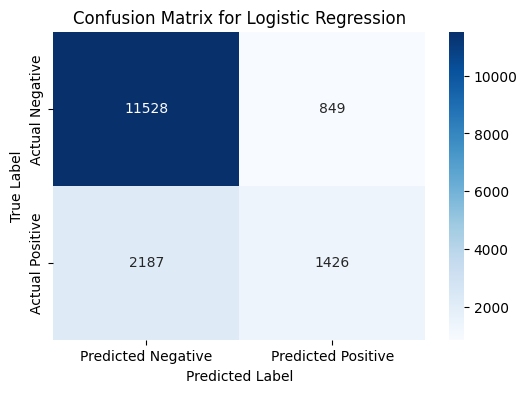

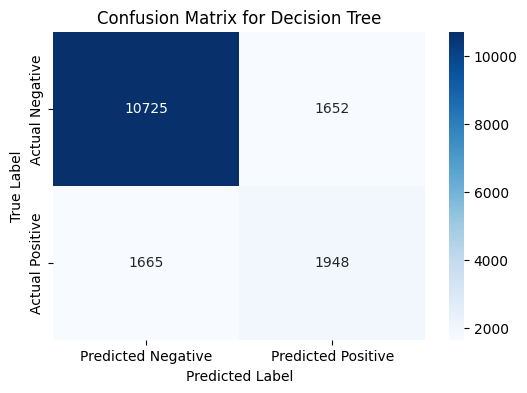

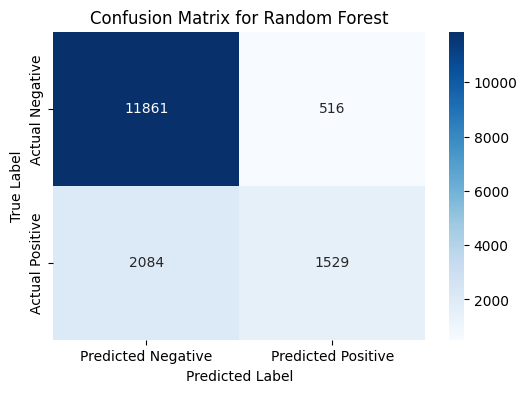

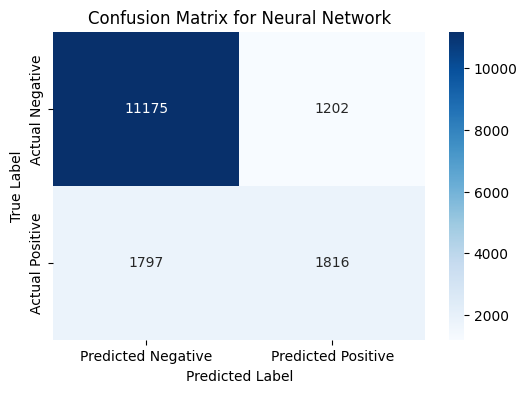

Generated confusion matrices for all classification models.


In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Neural Network": y_pred_nn
}

for model_name, y_predicted in models.items():
    cm = confusion_matrix(y_test_classification, y_predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("Generated confusion matrices for all classification models.")


Random Forest Feature Importances (Top 20):
                  Feature  Importance
11      album_name_length    0.055899
0             duration_ms    0.055032
3                loudness    0.053318
8                 valence    0.052314
5            acousticness    0.051864
2                  energy    0.051526
1            danceability    0.050625
9                   tempo    0.050021
4             speechiness    0.049677
7                liveness    0.049324
12      track_name_length    0.043925
6        instrumentalness    0.042546
110  track_genre_pop-film    0.029857
44      track_genre_chill    0.018117
94      track_genre_k-pop    0.016089
10            num_artists    0.012674
80    track_genre_hip-hop    0.011799
73     track_genre_grunge    0.010895
40    track_genre_british    0.009431
28                 mode_1    0.007525


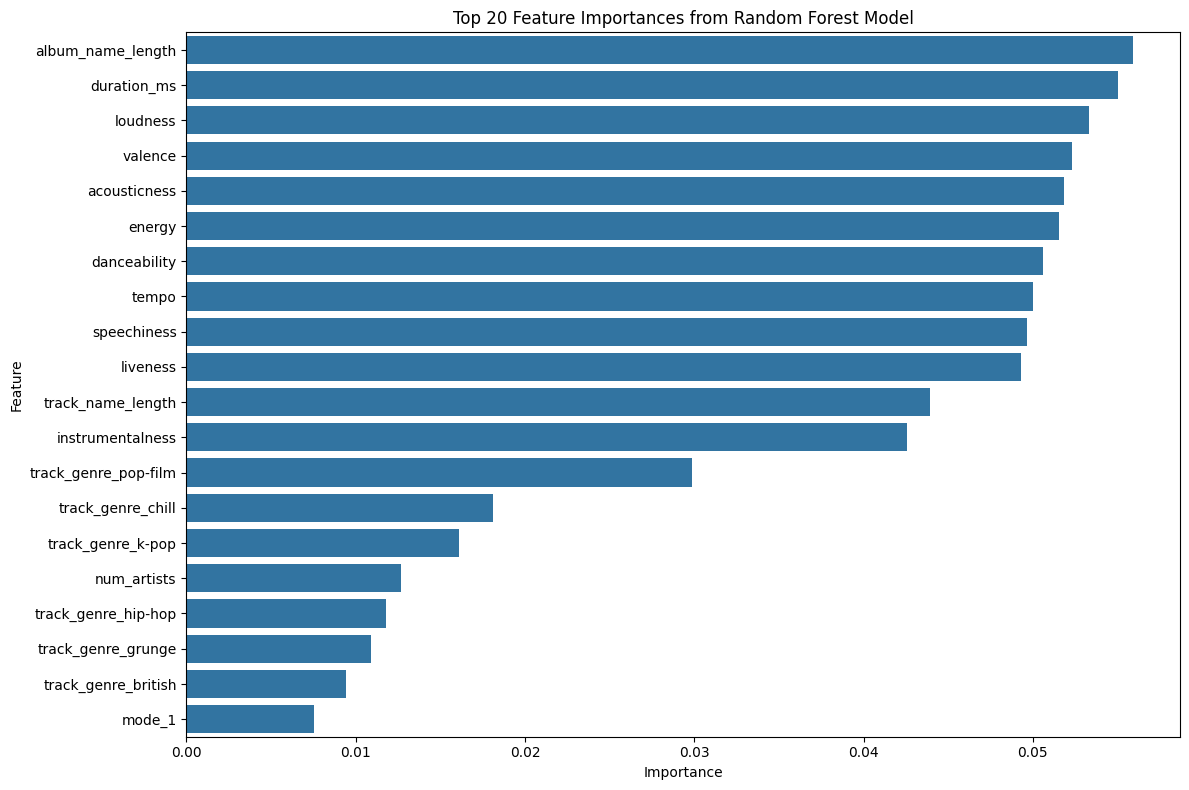

In [71]:
feature_importances = rf_model.feature_importances_
feature_names = X_train_processed.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances (Top 20):")
print(importance_df.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Decision Tree Feature Importances


Decision Tree Feature Importances (Top 20):
                           Feature  Importance
11               album_name_length    0.070900
0                      duration_ms    0.059804
5                     acousticness    0.056890
3                         loudness    0.056564
1                     danceability    0.054111
4                      speechiness    0.052091
9                            tempo    0.051987
2                           energy    0.050831
8                          valence    0.049754
12               track_name_length    0.049442
7                         liveness    0.044671
6                 instrumentalness    0.040821
110           track_genre_pop-film    0.031001
44               track_genre_chill    0.019989
94               track_genre_k-pop    0.016364
10                     num_artists    0.012354
80             track_genre_hip-hop    0.011830
73              track_genre_grunge    0.011256
40             track_genre_british    0.009657
112  track_genr

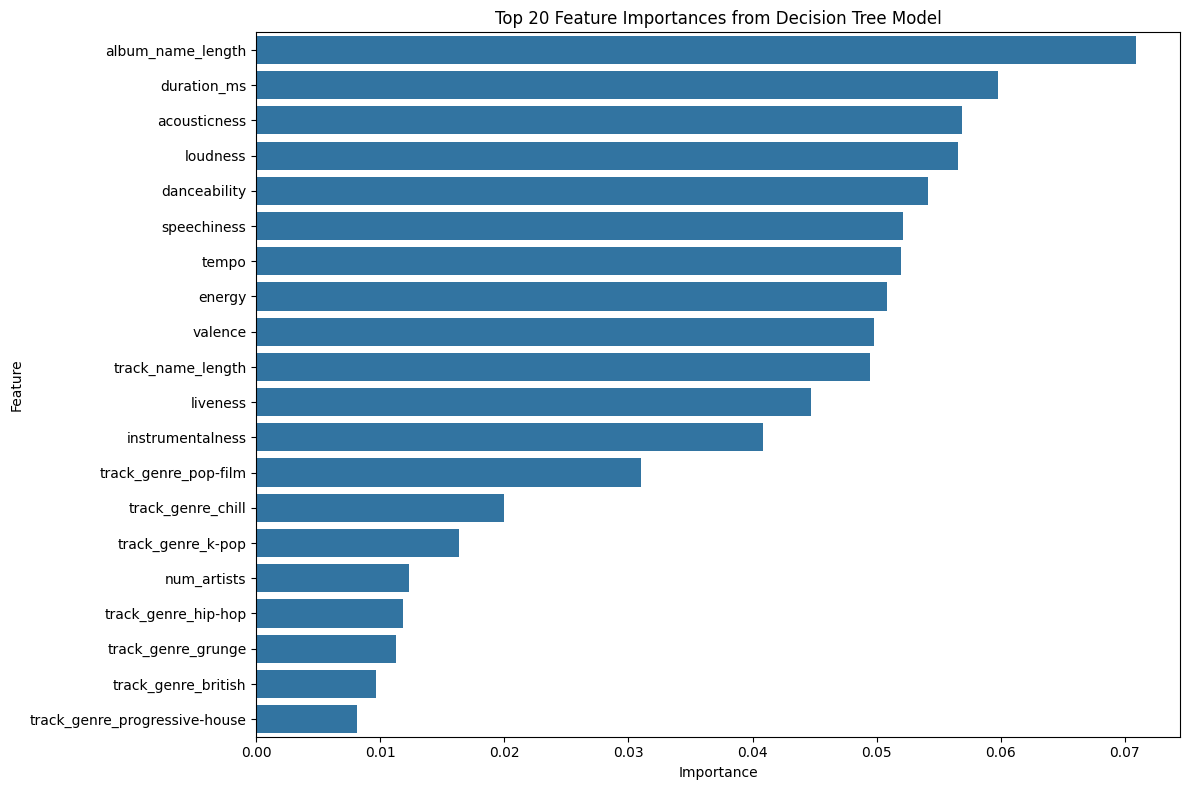

In [73]:
feature_importances_dt = dt_model.feature_importances_
feature_names = X_train_processed.columns

importance_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_dt
}).sort_values(by='Importance', ascending=False)

print("\nDecision Tree Feature Importances (Top 20):")
print(importance_df_dt.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_dt.head(20))
plt.title('Top 20 Feature Importances from Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# End of the analysis